In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

In [100]:
df=pd.read_csv('loan_approval_dataset.csv')
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [102]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [103]:
df.drop(columns=['loan_id'], inplace=True)

In [104]:
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [105]:
df.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [106]:
df.columns=df.columns.str.strip()

In [107]:
df.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [108]:
df['Total_Assets']=df.residential_assets_value+df.commercial_assets_value+df.luxury_assets_value+df.bank_asset_value
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,Total_Assets
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,50700000
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,17000000
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,57700000
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,52700000
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,55000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected,7400000
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved,20000000
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected,39000000
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved,28800000


In [109]:
df.drop(columns=['residential_assets_value',	'commercial_assets_value',	'luxury_assets_value',	'bank_asset_value'], inplace=True)
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Total_Assets
0,2,Graduate,No,9600000,29900000,12,778,Approved,50700000
1,0,Not Graduate,Yes,4100000,12200000,8,417,Rejected,17000000
2,3,Graduate,No,9100000,29700000,20,506,Rejected,57700000
3,3,Graduate,No,8200000,30700000,8,467,Rejected,52700000
4,5,Not Graduate,Yes,9800000,24200000,20,382,Rejected,55000000
...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,Rejected,7400000
4265,0,Not Graduate,Yes,3300000,11300000,20,559,Approved,20000000
4266,2,Not Graduate,No,6500000,23900000,18,457,Rejected,39000000
4267,1,Not Graduate,No,4100000,12800000,8,780,Approved,28800000


In [110]:
df.education.unique()

array([' Graduate', ' Not Graduate'], dtype=object)

In [111]:
def clean_data(st):
    st=st.strip()
    return st

In [112]:
clean_data(' Graduate')

'Graduate'

In [113]:
df.education=df.education.apply(clean_data)

In [114]:
df.education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [115]:
df.self_employed=df.self_employed.apply(clean_data)
df.self_employed.unique()

array(['No', 'Yes'], dtype=object)

In [116]:
df.education=df['education'].replace(['Graduate', 'Not Graduate'],[1,0])

In [117]:
df.self_employed=df['self_employed'].replace(['No', 'Yes'],[0,1])

In [118]:
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Total_Assets
0,2,1,0,9600000,29900000,12,778,Approved,50700000
1,0,0,1,4100000,12200000,8,417,Rejected,17000000
2,3,1,0,9100000,29700000,20,506,Rejected,57700000
3,3,1,0,8200000,30700000,8,467,Rejected,52700000
4,5,0,1,9800000,24200000,20,382,Rejected,55000000
...,...,...,...,...,...,...,...,...,...
4264,5,1,1,1000000,2300000,12,317,Rejected,7400000
4265,0,0,1,3300000,11300000,20,559,Approved,20000000
4266,2,0,0,6500000,23900000,18,457,Rejected,39000000
4267,1,0,0,4100000,12800000,8,780,Approved,28800000


In [119]:
df.loan_status.unique()

array([' Approved', ' Rejected'], dtype=object)

In [120]:
df.loan_status=df.loan_status.apply(clean_data)
df.loan_status.unique()

array(['Approved', 'Rejected'], dtype=object)

In [121]:
df.loan_status=df['loan_status'].replace(['Approved', 'Rejected'],[1,0])

In [122]:
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Total_Assets
0,2,1,0,9600000,29900000,12,778,1,50700000
1,0,0,1,4100000,12200000,8,417,0,17000000
2,3,1,0,9100000,29700000,20,506,0,57700000
3,3,1,0,8200000,30700000,8,467,0,52700000
4,5,0,1,9800000,24200000,20,382,0,55000000
...,...,...,...,...,...,...,...,...,...
4264,5,1,1,1000000,2300000,12,317,0,7400000
4265,0,0,1,3300000,11300000,20,559,1,20000000
4266,2,0,0,6500000,23900000,18,457,0,39000000
4267,1,0,0,4100000,12800000,8,780,1,28800000


no of loan taken in terms of education
education
1    2144
0    2125
Name: count, dtype: int64


<Axes: xlabel='education', ylabel='count'>

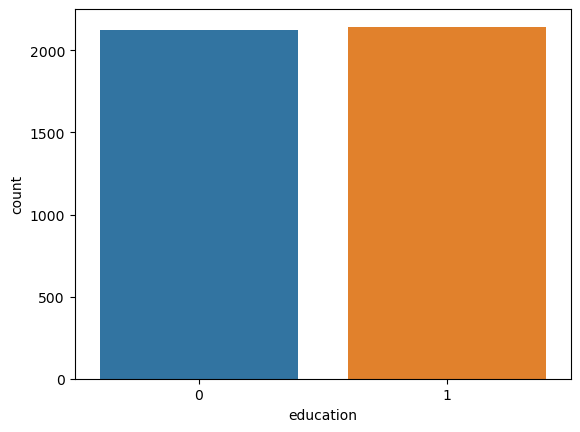

In [123]:
print('no of loan taken in terms of education')
print(df['education'].value_counts())
sns.countplot(x='education',data=df)

In [124]:
from sklearn.model_selection import train_test_split


In [125]:
input_data=df.drop(columns=['loan_status'])
output_data=df.loan_status

In [126]:
input_data

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,Total_Assets
0,2,1,0,9600000,29900000,12,778,50700000
1,0,0,1,4100000,12200000,8,417,17000000
2,3,1,0,9100000,29700000,20,506,57700000
3,3,1,0,8200000,30700000,8,467,52700000
4,5,0,1,9800000,24200000,20,382,55000000
...,...,...,...,...,...,...,...,...
4264,5,1,1,1000000,2300000,12,317,7400000
4265,0,0,1,3300000,11300000,20,559,20000000
4266,2,0,0,6500000,23900000,18,457,39000000
4267,1,0,0,4100000,12800000,8,780,28800000


In [127]:
output_data

0       1
1       0
2       0
3       0
4       0
       ..
4264    0
4265    1
4266    0
4267    1
4268    1
Name: loan_status, Length: 4269, dtype: int64

In [128]:
x_train,x_test,y_train,y_test=train_test_split(input_data,output_data, test_size=0.3, random_state=43)

In [129]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((2988, 8), (1281, 8), (2988,), (1281,))

In [130]:
from sklearn.preprocessing import StandardScaler

In [131]:
scaler=StandardScaler()

In [132]:
x_train_scaled=scaler.fit_transform(x_train)


In [133]:
x_test_scaled=scaler.fit_transform(x_test)

In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [135]:
model=DecisionTreeClassifier()

In [136]:
model.fit(x_train_scaled,y_train)

DecisionTreeClassifier()

In [137]:
model.score(x_test_scaled,y_test)

0.9648711943793911

In [138]:
pred_data=pd.DataFrame([['0','0','1','4100000','12200000','8','417','17000000']],columns=['no_of_dependents','education','self_employed','income_annum','loan_amount','loan_term','cibil_score','Total_Assets'])

In [139]:
pred_data=scaler.transform(pred_data)

In [140]:
model.predict(pred_data)

array([0], dtype=int64)

In [144]:
import pickle as pk

In [145]:
pk.dump(model,open('model.pkl','wb'))

In [146]:
pk.dump(scaler,open('scaler.pkl','wb'))